# Les opérations I/O et la sérialisation

## Les opérations I/O

.NET dispose d’une espace de nom complet dédié aux opérations I/O: `System.IO`.

Cette espace de nom permet d’interagir avec la structure de dossier et de fichier de la machine de façon  programmatique.

De plus, elle permet de manipuler du data binaire en mémoire à l’aide de plusieurs classes spécialisées

### `System.IO`

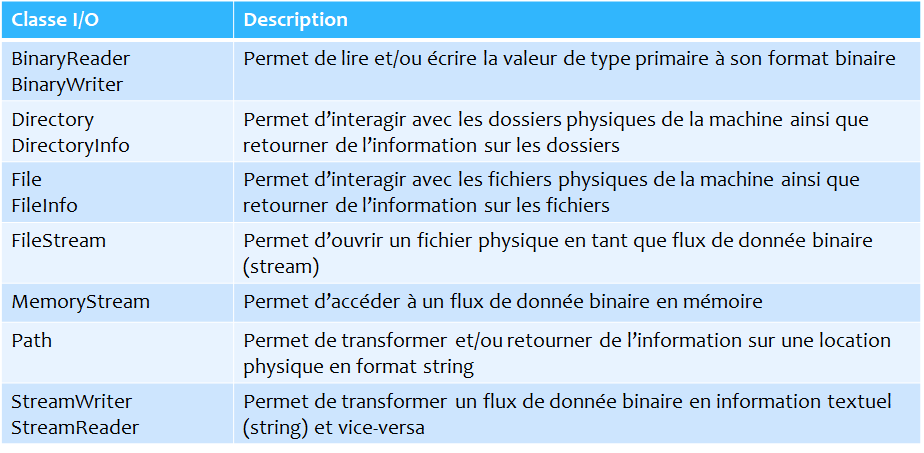

#### Directory et DirectoryInfo

Les classes `Directory` et `DirectoryInfo` facilitent l’interaction et la récupération d’informations sur un ou plusieurs dossiers physiques.

La classe `Directory` comprend que des méthodes statiques tandis que la classe `DirectoryInfo` comprend que des méthodes membres (un dossier est donc représenté en tant qu’instance de `DirectoryInfo`).

##### La classe `Directory`

Les méthodes statiques les plus utilisées sont :

- `CreateDirectory(path)` : Crée le dossier spécifié
- `Delete(path)` : Supprime le dossier spécifié
- `Exists(path)` : Indique si le dossier spécifié existe
- `GetCurrentDirectory()` : Retourne la location complète du dossier courant (« current working directory »)
- `GetDirectories(path)` : Retourne un tableau de string de tous les sous-dossiers du dossier spécifié
- `GetFiles(path)` : Retourne un tableau de string de tous les sous-fichiers du dossier spécifié


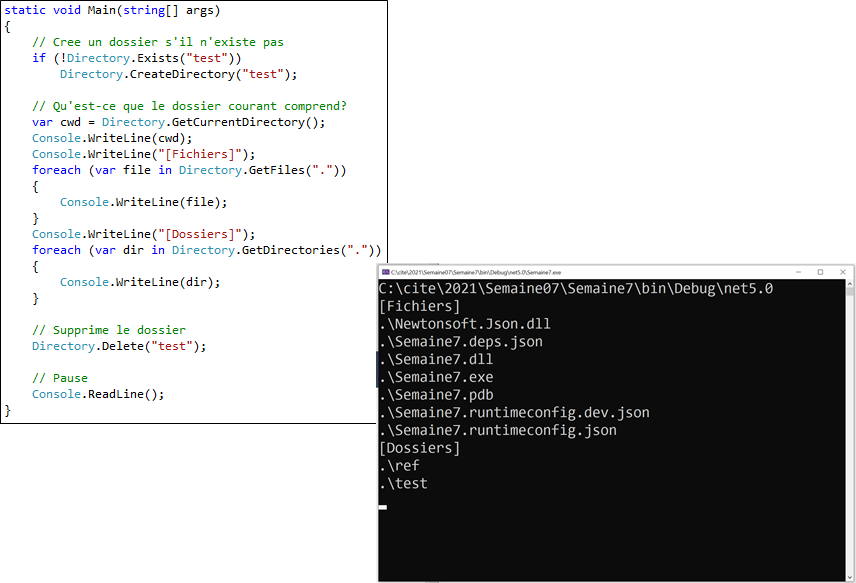

In [3]:
using System.IO;

// Cree un dossier s'il n'existe pas
if (!Directory.Exists("test"))
    Directory.CreateDirectory("test");

// Qu'est-ce que le dossier courant comprend?
var cwd = Directory.GetCurrentDirectory();
Console.WriteLine(cwd);
Console.WriteLine("[Fichiers]");
foreach (var file in Directory.GetFiles("."))
{
    Console.WriteLine(file);
}
Console.WriteLine("[Dossiers]");
foreach (var dir in Directory.GetDirectories("."))
{
    Console.WriteLine(dir);
}

// Supprime le dossier
Directory.Delete("test");

/home/jovyan/notebooks/108
[Fichiers]
./Untitled.ipynb
[Dossiers]
./.ipynb_checkpoints
./test


##### La classe `DirectoryInfo`

Une instance de `DirectoryInfo` peut être créée en passant le nom du dossier en paramètre au constructeur.

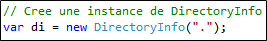

Les membres les plus utilisés sont :

- `CreateSubdirectory(path)` : Crée (et retourne) un sous-dossier dans le dossier courant (représenté par le `DirectoryInfo`)
- `Delete()` : Supprime le dossier courant
- `Exists` : Indique si le dossier courant existe
- `FullName` : Retourne la location complète du dossier courant
- `GetFiles()` : Retourne un tableau de string de tous les sous- fichiers du dossier courant
- `GetDirectories()` : Retourne un tableau de string tous les sous- dossiers du dossier courant
- `Name` : Retourne le nom du dossier courant
- `Parent` : Retourne le `DirectoryInfo` représentant le dossier parant

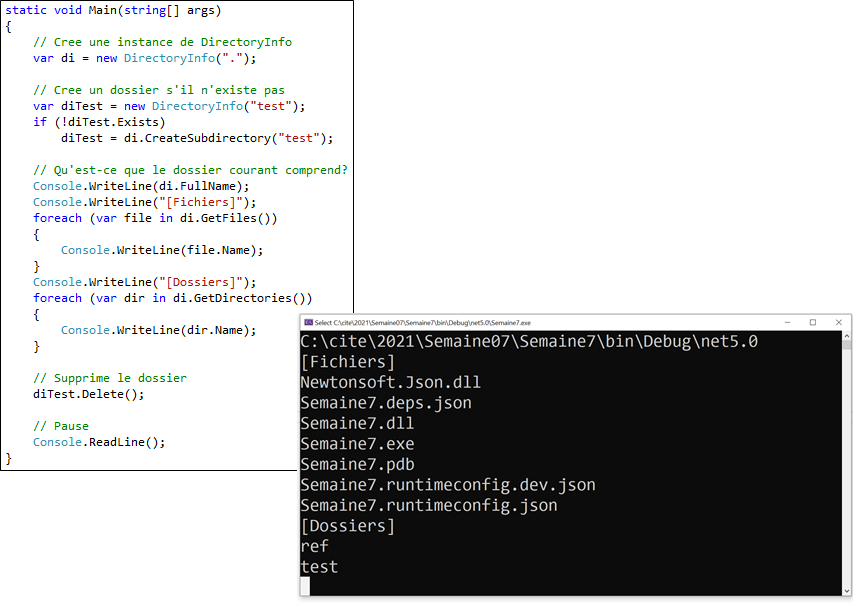

In [49]:
using System.IO;

// Cree une instance de DirectoryInfo
var di = new DirectoryInfo(".");

//var t = new DirectoryInfo(@"C:\33");

// Cree un dossier s'il n'existe pas
var diTest = new DirectoryInfo("test");
if (!diTest.Exists)
    diTest = di.CreateSubdirectory("test");

// Qu'est-ce que le dossier courant comprend?
Console.WriteLine(di.FullName);
Console.WriteLine("[Fichiers]");
foreach (var file in di.GetFiles())
{
    Console.WriteLine(file.Name);
}
Console.WriteLine("[Dossiers]");
foreach (var dir in di.GetDirectories())
{
    Console.WriteLine(dir.Name);
}

// Supprime le dossier
diTest.Delete();

/home/jovyan/notebooks/108
[Fichiers]
1 - Les operations IO et la serialisation.ipynb
data.bin
personne.bin
[Dossiers]
.ipynb_checkpoints
test


#### `File` et `FileInfo`

Les classes `File` et `FileInfo` facilitent l’interaction et la récupération d’informations sur un ou plusieurs fichiers physiques.

La classe `File` comprend que des méthodes statiques, tandis que la classe `FileInfo` comprend que des méthodes membres (un fichier est donc représenté en tant qu’instance de `FileInfo`)


##### La classe `File`

Les méthodes statiques les plus utilisées sont :

- `Create(path)` : Crée le fichier spécifié et retourne un `FileStream`
- `Copy(source, dest)` : Fait une copie du fichier spécifié
- `Delete(path)` : Supprime le fichier spécifié
- `Exists(path)` : Indique si le fichier spécifié existe
- `Move(source, dest)` : Déplace ou renomme le fichier spécifié

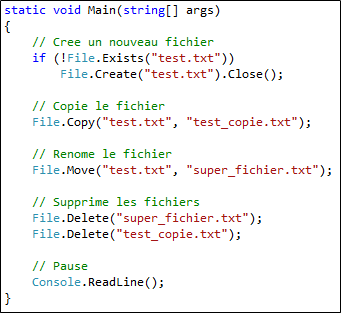

In [34]:
using System.IO;

// Cree un nouveau fichier
if (!File.Exists("test.txt"))
    File.Create("test.txt").Close();

// Copie le fichier
File.Copy("test.txt", "test_copie.txt");

// Renome le fichier
File.Move("test.txt", "super_fichier.txt");

// Supprime les fichiers
File.Delete("super_fichier.txt");
File.Delete("test_copie.txt");

In [53]:
#!powershell

ls -al

total 936
drwxr-xr-x 1 jovyan users   4096 Mar 11 03:03 .
drwxrwxrwx 1 root   root    4096 Mar 11 01:33 ..
-rw-r--r-- 1 jovyan users 954379 Mar 11 03:03 1 - Les operations IO et la serialisation.ipynb
drwxr-xr-x 1 jovyan users   4096 Mar 11 03:02 .ipynb_checkpoints


##### La classe `FileInfo`

Une instance de `FileInfo` peut être créée en passant le nom du fichier en paramètre au constructeur.

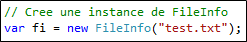

Les membres les plus utilisés sont :

- `CopyTo(dest)` : Copie le fichier courant (représenté par le `FileInfo`)
- `Create()` : Crée le fichier courant et retourne un `FileStream`
- `Delete()` : Supprime le fichier courant
- `Directory` : Retourne le `DirectoryInfo` du dossier contenant le fichier courant
- `Exists` : Indique si le fichier courant existe
- `FullName` : Retourne la location complète du fichier courant
- `MoveTo(dest)` : Déplace ou renomme le fichier courant
- `Name` : Retourne le nom du fichier courant

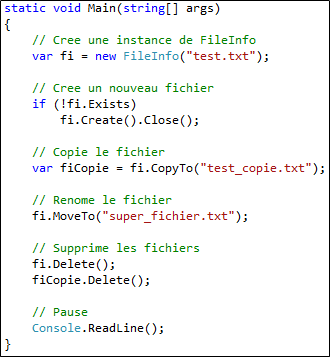

In [37]:
using System.IO;

// Cree une instance de FileInfo
var fi = new FileInfo("test.txt");

// Cree un nouveau fichier
if (!fi.Exists)
    fi.Create().Close();

// Copie le fichier
var fiCopie = fi.CopyTo("test_copie.txt");

// Renome le fichier
fi.MoveTo("super_fichier.txt");

// Supprime les fichiers
fi.Delete();
fiCopie.Delete();

In [52]:
#!powershell

ls -al

total 936
drwxr-xr-x 1 jovyan users   4096 Mar 11 03:03 .
drwxrwxrwx 1 root   root    4096 Mar 11 01:33 ..
-rw-r--r-- 1 jovyan users 954379 Mar 11 03:03 1 - Les operations IO et la serialisation.ipynb
drwxr-xr-x 1 jovyan users   4096 Mar 11 03:02 .ipynb_checkpoints


## Stream

Tout flux de données en .NET est représenté par la classe abstraite « `System.IO.Stream` »

Toute classe héritant de « `Stream` » peut possiblement (déterminée par le programmeur ayant crée la classe) :
- Être utilisée pour lire (`CanRead`)
- Être utilisée pour écrire (`CanWrite`)
- Être utilisée pour se déplacer à l’intérieur du flux (`CanSeek`)

La classe « `Stream` » implémente l’interface `IDisposable`; toute instance d’une classe « `Stream` » devrait être faite à l’aide d’une instruction « `using` »

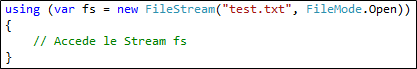


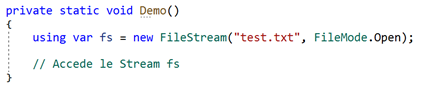

Les membres les plus utilisés sont :

- `Close()` : Ferme le flux ainsi que toutes autres ressources associées au flux (tel qu’un « I/O Lock » avec un `FileStream`)
- `Flush()` : Prend le contenu du buffer et le transpose (donc vide le buffer) dans la source de donnée sous-jacente
- `Length` : Indique le montant de bytes dans le flux
- `Position` : Indique la position courante du flux
- `Read()` : Retourne une séquence de bytes dans un tableau et avance la position du flux
- `ReadByte()` : Retourne un byte et avance la position du flux de un
- `Seek()` : Change la position du flux
- `Write()` : Écrit une séquence de bytes dans le flux tout en avançant la position du flux
- `WriteByte()` : Écrit un byte et avance la position du flux de un

### La classe `FileStream`
Représente un flux de données d’un fichier physique.

### La classe `MemoryStream`
Représente un flux de données stocké en mémoire (donc aucune référence physique).


### La classe `StreamReader`

Un `StreamReader` permet de lire un flux de données représentant du texte (donc une `string`).

Un `StreamReader` est la classe recommandée pour la lecture d’un fichier (ou données) texte.

Les membres les plus utilisés sont :

- `EndOfStream` : Indique si on est à la fin du flux de données
- `ReadBlock()` : Retourne un nombre spécifique de caractères du flux
- `ReadLine()` : Retourne une `string` délimitée par un `\n`
- `ReadToEnd()` : Retourne une `string` représentant le flux de données complet

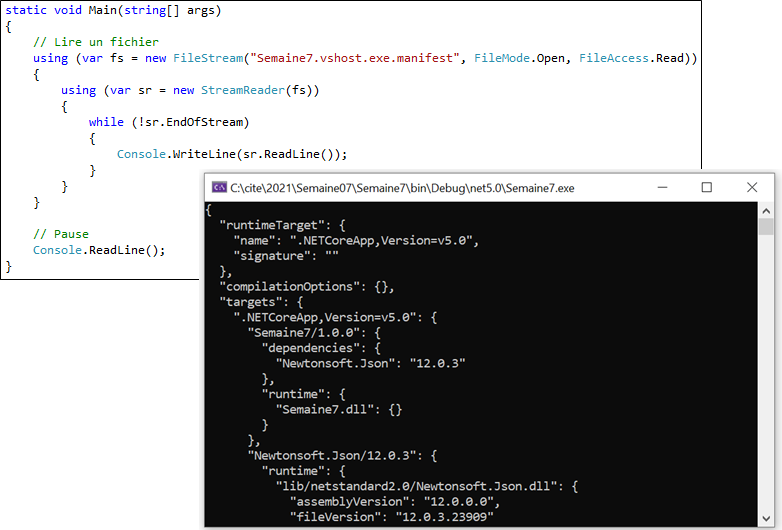

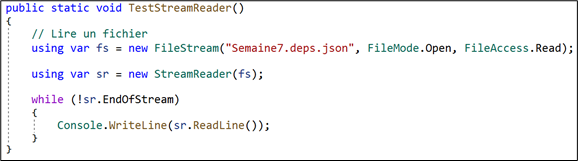

### La classe `StreamWriter`

Un `StreamWriter` permet d’écrire à un flux de données représentant du texte (donc une `string`).

Un `StreamWriter` est la classe recommandée pour l’écriture à un fichier (ou données) texte.

Les membres les plus utilisés sont :

- `AutoFlush` : Indique si le buffer du flux devrait être vidé à chaque instruction d’écriture (`Write` ou `WriteLine`)
- `Write()` : Écrit au flux
- `WriteLine()` : Écrit au flux en terminant avec une nouvelle ligne

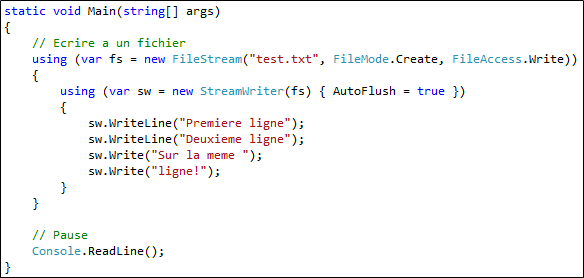

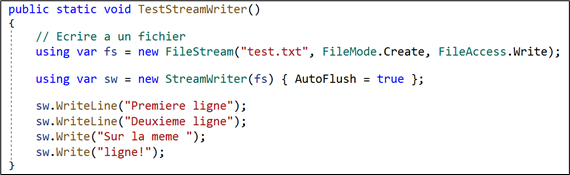

In [31]:
using System.IO;

// Ecrire a un fichier
using (var fs = new FileStream("test.txt", FileMode.Create, FileAccess.Write))
{
    using (var sw = new StreamWriter(fs) { AutoFlush = true })
    {
        sw.WriteLine("Premiere ligne");
        sw.WriteLine("Deuxieme ligne");
        sw.Write("Sur la meme ");
        sw.Write("ligne!");
    }
}

In [32]:
#!powershell

ls -al

total 768
drwxr-xr-x 1 jovyan users   4096 Mar 11 02:27 .
drwxrwxrwx 1 root   root    4096 Mar 11 01:33 ..
drwxr-xr-x 1 jovyan users   4096 Mar 11 01:33 .ipynb_checkpoints
-rw-r--r-- 1 jovyan users     48 Mar 11 02:27 test.txt
-rw-r--r-- 1 jovyan users 783835 Mar 11 02:27 Untitled.ipynb


In [33]:
#!powershell

cat test.txt

Premiere ligne
Deuxieme ligne
Sur la meme ligne!


### Les classe `BinaryReader` et `BinaryReader`

Les classes `BinaryReader` et `BinaryWriter` sont souvent utilisées pour faire de la sérialisation d’objets de façon manuelle.

Ces classes permettent de transformer des types primaires en data binaire pouvant donc être stocké dans un fichier physique ou transférer électroniquement.

Un `BinaryReader` comprend plusieurs méthodes différentes commençant par « `Read` » afin de permettre la lecture de tous les types primaires.

Un `BinaryWriter` comprend plusieurs signatures différentes de la méthode « `Write` » afin de permettre l’écriture de tous les types primaires.


#### `BinaryWriter`

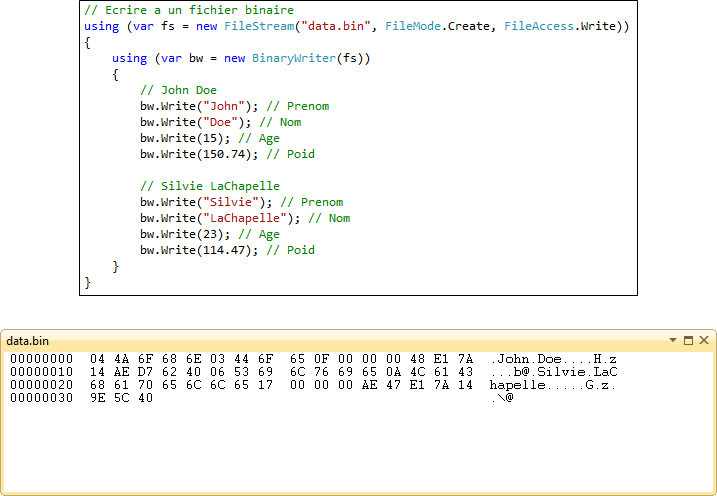

#### `BinaryReader`

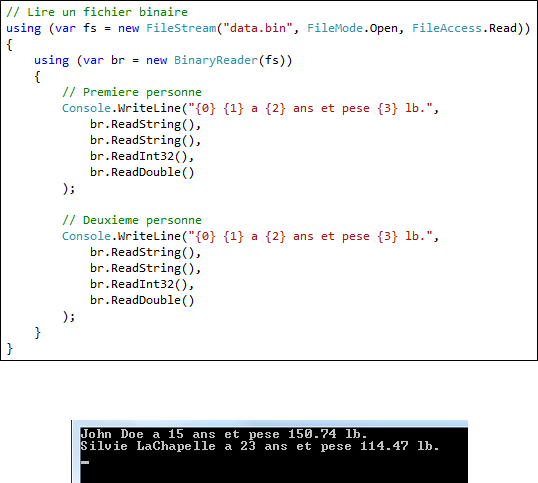

In [41]:
// Ecrire a un fichier binaire
using (var fs = new FileStream("data.bin", FileMode.Create, FileAccess.Write))
{
    using (var bw = new BinaryWriter(fs))
    {
        // John Doe
        bw.Write("John"); // Prenom
        bw.Write("Doe"); // Nom
        bw.Write(15); // Age
        bw.Write(150.74); // Poid

        // Silvie LaChapelle
        bw.Write("Silvie"); // Prenom
        bw.Write("LaChapelle"); // Nom
        bw.Write(23); // Age
        bw.Write(114.47); // Poid
    }
}

In [42]:
#!powershell

ls -al

total 768
drwxr-xr-x 1 jovyan users   4096 Mar 11 02:32 .
drwxrwxrwx 1 root   root    4096 Mar 11 01:33 ..
-rw-r--r-- 1 jovyan users     51 Mar 11 02:32 data.bin
drwxr-xr-x 1 jovyan users   4096 Mar 11 01:33 .ipynb_checkpoints
-rw-r--r-- 1 jovyan users 786315 Mar 11 02:31 Untitled.ipynb


In [43]:
#!powershell

cat data.bin

JohnDoe   H�z��b@Silvie
LaChapelle   �G�z�\@


In [44]:
// Lire un fichier binaire
using (var fs = new FileStream("data.bin", FileMode.Open, FileAccess.Read))
{
    using (var br = new BinaryReader(fs))
    {
        // Premiere personne
        Console.WriteLine("{0} {1} a {2} ans et pese {3} lb.",
                          br.ReadString(),
                          br.ReadString(),
                          br.ReadInt32(),
                          br.ReadDouble()
            );

        // Deuxieme personne
        Console.WriteLine("{0} {1} a {2} ans et pese {3} lb.",
                          br.ReadString(),
                          br.ReadString(),
                          br.ReadInt32(),
                          br.ReadDouble()
            );
    }
}

John Doe a 15 ans et pese 150.74 lb.
Silvie LaChapelle a 23 ans et pese 114.47 lb.


## La sérialisation

Afin qu’un type puisse être sérialisé, toutes ses propriétés et variables membres doivent être sérialisables elles-mêmes
Un membre peut être exclu de la sérialisation en ajoutant l’attribut « `NonSerialized` ».

La sérialisation peut être faite en plusieurs formats différents dont:

- Binaire (`BinaryFormatter`)
- SOAP (en .NET Framework `SoapFormatter`)
- XML (`XmlSerializer`)
- JSON (`Newtonsoft.Json` ou `System.Text.Json`)

La sérialisation d’un objet sérialisable est faite à l’aide d’un flux quelconque (`MemoryStream`, `FileStream`, etc.)

### `BinaryFormatter`

Afin de sérialiser un objet en format binaire, on doit initialiser un objet de type `BinaryFormatter`

L’espace de nom « `System.Runtime.Serialization.Formatters.Binary` » doit être rajoutée au fichier .cs.


 > <span style="color: red;">Plus supporté en .NET Core ou .NET 5.0</span>
 >
 > https://docs.microsoft.com/en-us/dotnet/standard/serialization/binaryformatter-security-guide

La méthode « `Serialize` » du `BinaryFormatter` permet de sérialiser un objet à un flux directement.

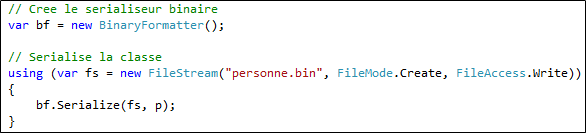

La méthode « `Deserialize` » du `BinaryFormatter` retourne un objet (de type « `object` » donc une conversion est requise) à partir d’un flux.

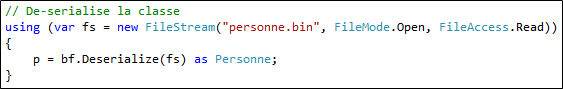

In [48]:
using System.IO;
using System.Runtime.Serialization.Formatters.Binary;

public class Personne
{
    public Personne() { }
    
    public Personne(string prenom, string nom, int age, double poids)
    {
        this.Prenom = prenom;
        this.Nom    = nom;
        this.Age    = age;
        this.Poids  = poids;
    }
    
    public string Prenom { get; set; }
    public string Nom    { get; set; }
    public int    Age    { get; set; }
    public double Poids  { get; set; }
}

// Cree une Personne
var p = new Personne("John", "Doe", 15, 150.74);

// Cree le serialiseur binaire
var bf = new BinaryFormatter();

// Serialise la classe
using (var fs = new FileStream("personne.bin", FileMode.Create, FileAccess.Write))
{
    bf.Serialize(fs, p);
}

// De-serialise la classe
using (var fs = new FileStream("personne.bin", FileMode.Open, FileAccess.Read))
{
    p = bf.Deserialize(fs) as Personne;
}


(31,5): warning SYSLIB0011: 'BinaryFormatter.Serialize(Stream, object)' is obsolete: 'BinaryFormatter serialization is obsolete and should not be used. See https://aka.ms/binaryformatter for more information.'

(37,9): warning SYSLIB0011: 'BinaryFormatter.Deserialize(Stream)' is obsolete: 'BinaryFormatter serialization is obsolete and should not be used. See https://aka.ms/binaryformatter for more information.'



Unhandled exception: System.NotSupportedException: BinaryFormatter serialization and deserialization are disabled within this application. See https://aka.ms/binaryformatter for more information.
   at System.Runtime.Serialization.Formatters.Binary.BinaryFormatter.Serialize(Stream serializationStream, Object graph)
   at Submission#32.<<Initialize>>d__0.MoveNext()
--- End of stack trace from previous location ---
   at Microsoft.CodeAnalysis.Scripting.ScriptExecutionState.RunSubmissionsAsync[TResult](ImmutableArray`1 precedingExecutors, Func`2 currentExecutor, StrongBox`1 exceptionHolderOpt, Func`2 catchExceptionOpt, CancellationToken cancellationToken)

### La classe `SoapFormatter`

La méthode « `Serialize` » du `SoapFormatter` permet de sérialiser un objet à un flux directement.

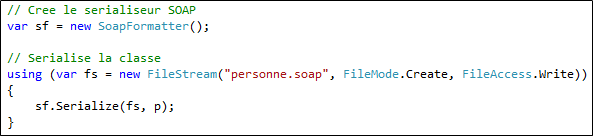

La méthode « `Deserialize` » du `SoapFormatter` retourne un objet (de type « `object` » donc une conversion est requise) à partir d’un flux.

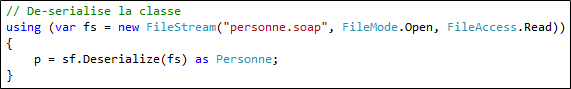

 > <span style="color: red;">Plus supporté en .NET Core ou .NET 5.0</span>
 >
 > https://docs.microsoft.com/en-us/dotnet/standard/serialization/binaryformatter-security-guide

### La classe `XmlSerializer`

Afin de sérialiser un objet en format XML, on doit initialiser un objet de type `XmlSerializer`.
- Le type d’objet à sérialiser doit être passé en paramètre au constructeur de `XmlSerializer`

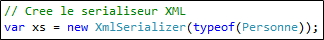

L’espace de nom « `System.Xml.Serialization` » doit être rajoutée au fichier `.cs`.

Un `XmlSerializer` va <span style="color: red;">SEULEMENT</span> sérialiser et dé-sérialiser des <span style="color: red;">propriétés publiques</span>.

Un `XmlSerializer` nécessite également que tout type à sérialiser contienne un constructeur par défaut.

La sérialisation en XML peut être personnalisée à l’aide d’attributs spécifiques pour le `XmlSerializer`.

Ces attributs peuvent être rajoutés soit à des propriétés membres ou à des définitions de classes.

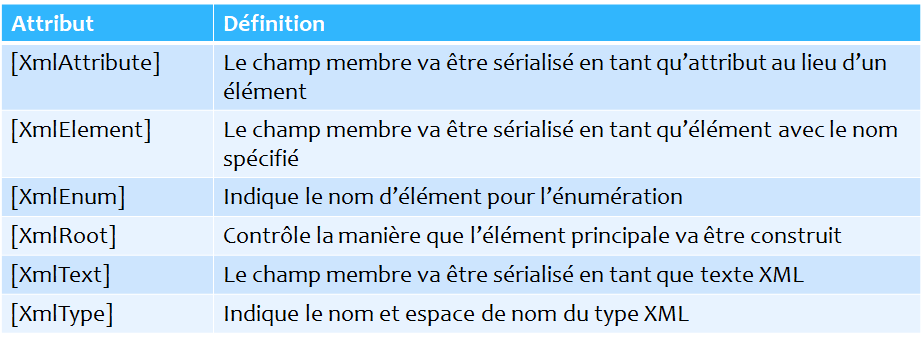

Pour la liste complète, consulter: https://docs.microsoft.com/en-us/dotnet/standard/serialization/attributes-that-control-xml-serialization

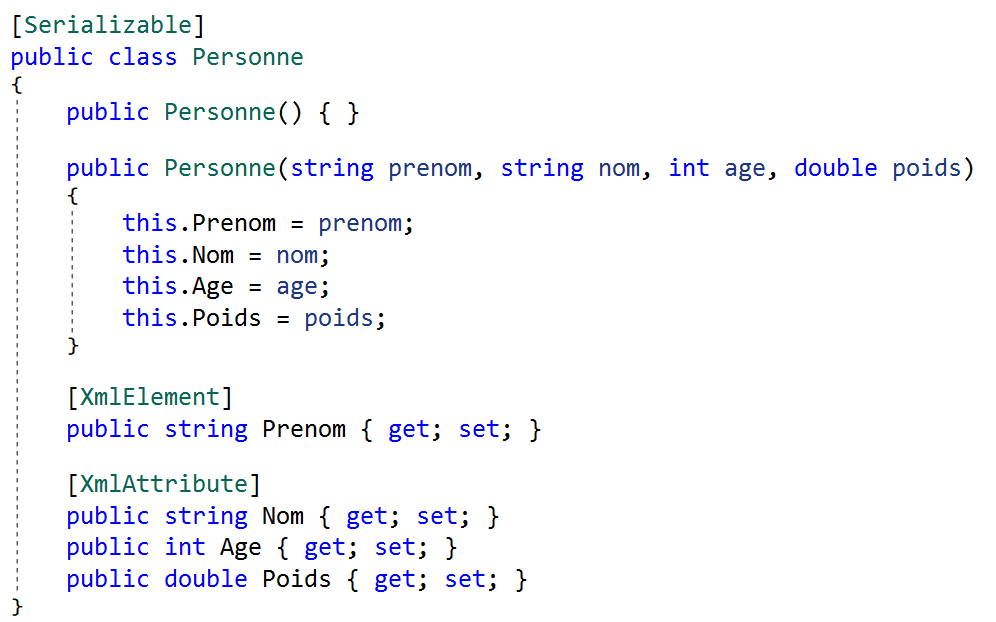